In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [162]:
def get_data(mode):
    
    files = glob.glob('../data/output/{}_sentiment_*.csv'.format(mode))
    files.sort()
    
    df = pd.DataFrame()
    for file in files:
        temp = pd.read_csv(file)
        df = pd.concat([df, temp])

    return df

In [163]:
def date_df(df):
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    return df

In [164]:
analysis_countries = [
    'United Kingdom',
    'United States',
    'Netherlands',
    'Sweden',
    'Germany',
    'France'
]

In [165]:
df_all = get_data(mode='daily')
df_all = df_all[df_all['count']>=1000]
df_all = date_df(df_all)

df_lang = get_data(mode='lang')
df_lang = df_lang[df_lang['count']>=100]
df_lang = date_df(df_lang)
score_vars = [var for var in list(df_lang) if var[-5:]=="score"]
count_vars = [var for var in list(df_lang) if var[-5:]=="count"]
df_lang = df_lang.pivot(index='date', columns='lang', values=score_vars+count_vars)
df_lang.columns = ['_'.join(col).strip() for col in df_lang.columns.values]
df_lang.reset_index(inplace=True)

df_en_country = get_data(mode='country_en')
df_en_country = df_en_country[df_en_country['count']>=100]
df_en_country = df_en_country[df_en_country['country'].isin(analysis_countries)]
df_en_country = date_df(df_en_country)
score_vars = [var for var in list(df_en_country) if var[-5:]=="score"]
count_vars = [var for var in list(df_en_country) if var[-5:]=="count"]
df_en_country = df_en_country.pivot(index='date', columns='country', values=score_vars+count_vars)
df_en_country.columns = ['_'.join(col).strip() for col in df_en_country.columns.values]
df_en_country.reset_index(inplace=True)

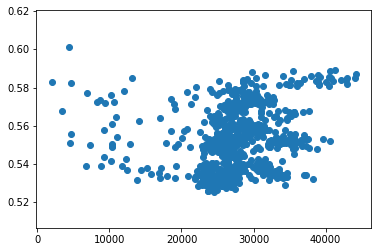

In [166]:
plt.scatter(df_all['count'], df_all['score'])
plt.show()

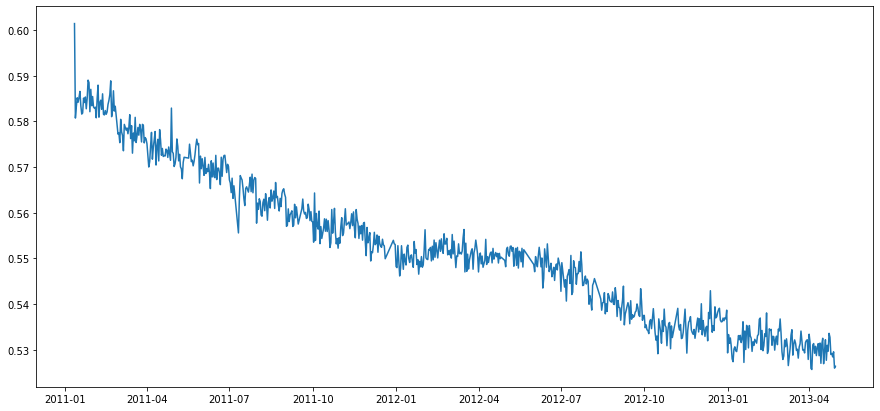

In [167]:
plt.figure(figsize=(15,7))
plt.plot(df_all['date'], df_all['score'])
plt.show()

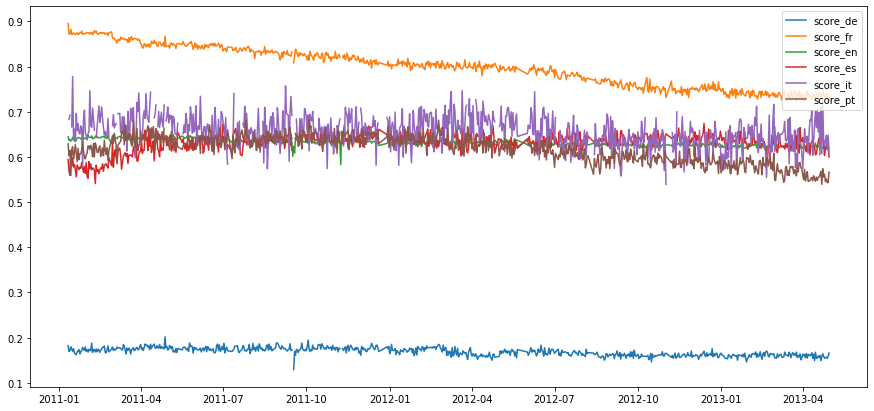

In [168]:
plt.figure(figsize=(15,7))
for lang in ['de', 'fr', 'en', 'es', 'it', 'pt']:
    plt.plot(df_lang['date'], df_lang['score_'+lang], label='score_'+lang)
plt.legend(loc = "upper right")
plt.show()

## Restricting to English

In [179]:
cols = ['date']+[col for col in list(df_lang) if col[-3:]=="_en"]
df_en = df_lang[cols]
cols = [col.replace("_en", "") for col in list(df_en)]
df_en.columns = cols

df_en = df_en[df_en['count']>=1000]

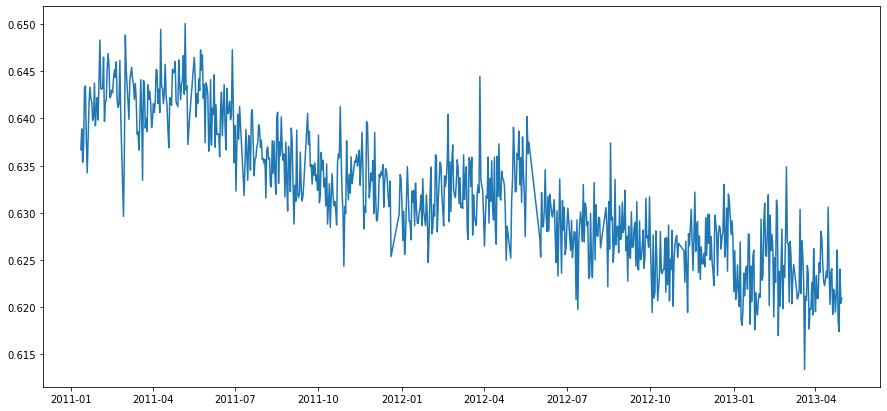

In [180]:
plt.figure(figsize=(15,7))
plt.plot(df_en['date'], df_en['score'])
plt.show()

In [181]:
print('"Happiest" Days:')
df_en.sort_values('score', ascending=False).head(10)['date']

"Happiest" Days:


113   2011-05-07
86    2011-04-10
48    2011-03-02
22    2011-02-02
161   2011-06-28
126   2011-05-24
31    2011-02-11
128   2011-05-26
111   2011-05-05
26    2011-02-06
Name: date, dtype: datetime64[ns]

01-01: New Years

02-14: Valentine's day

2012-05-12: Mother's day

2011-04-28: Prince Andrew and Kate Middleton's wedding

2011-04-24: Easter

In [182]:
print('"Saddest" Days:')
df_en.sort_values('score', ascending=True).head()['date']

"Saddest" Days:


750   2013-03-20
722   2013-02-19
788   2013-04-27
696   2013-01-24
755   2013-03-25
Name: date, dtype: datetime64[ns]

2011-07-05: Casey Anthony found not guilty over the murder of her daughter

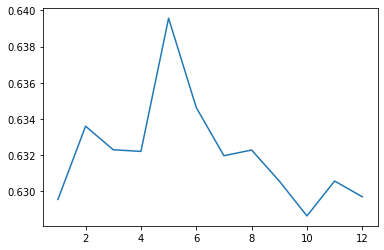

In [183]:
df_en['month'] = pd.DatetimeIndex(df_en['date']).month
month_fe = df_en.groupby('month')['score'].mean().reset_index()
plt.plot(month_fe['month'], month_fe['score'])
plt.show()

## English by Country

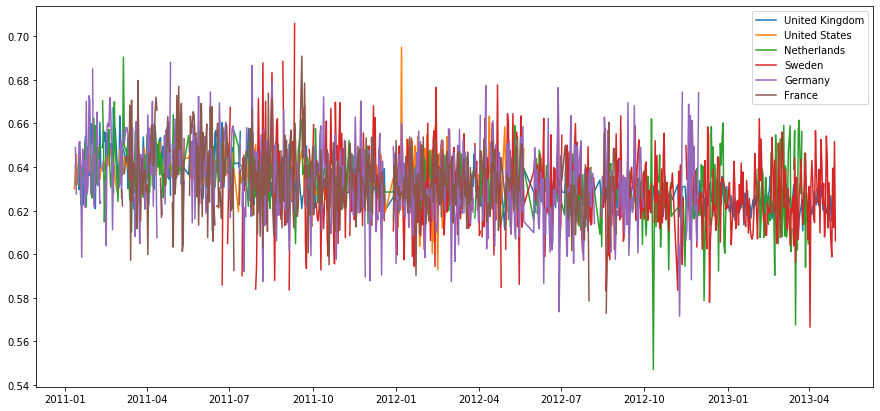

In [184]:
plt.figure(figsize=(15,7))
for country in analysis_countries:
        plt.plot(df_en_country['date'], df_en_country['score_'+country], label=country)
plt.legend(loc = "upper right")
plt.show()

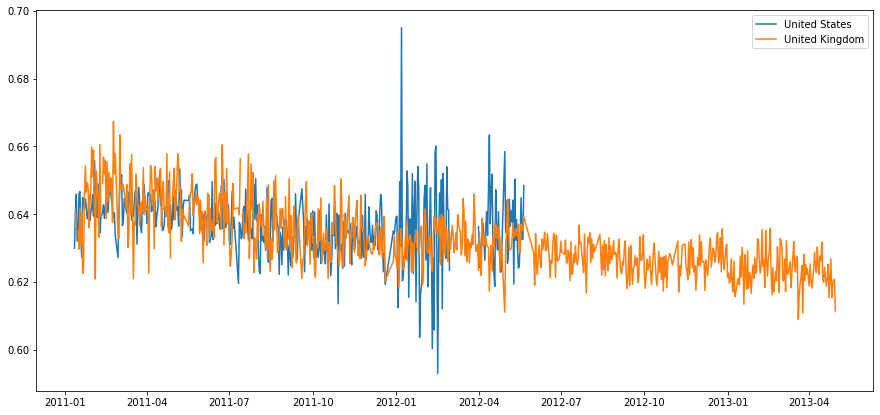

In [185]:
plt.figure(figsize=(15,7))
for country in ['United States', 'United Kingdom']:
        plt.plot(df_en_country['date'], df_en_country['score_'+country], label=country)
plt.legend(loc = "upper right")
plt.show()

In [157]:
df_en_country = get_data(mode='country_en')

In [160]:
df_en_country[df_en_country['country']=='United States']#['count']

,country,year,month,day,score,count,liwc_score,liwc_count,hedono_score,hedono_count,emoji_score,emoji_count,score_quantile
2070,United States,2011,1,11,0.611012,1004,0.658971,1004,0.550973,929,0.675982,2,4
2071,United States,2011,1,12,0.615604,6029,0.668746,6029,0.551463,5566,0.680987,19,4
2072,United States,2011,1,13,0.629759,5333,0.690704,5333,0.553728,4950,0.733084,22,4
2073,United States,2011,1,14,0.633933,2488,0.695008,2488,0.554233,2271,0.811782,7,5
2074,United States,2011,1,15,0.634768,5479,0.698652,5479,0.556169,5042,0.748659,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,United States,2013,4,26,0.602372,84,0.657540,84,0.547925,80,0.611456,8,3
540,United States,2013,4,27,0.583144,81,0.595679,81,0.546219,71,0.660390,17,2
541,United States,2013,4,28,0.601863,71,0.637089,71,0.551271,68,0.634113,6,3
542,United States,2013,4,29,0.612371,90,0.658333,90,0.557125,82,0.578895,9,3


In [133]:
df_en_country

,date,score_France,score_Germany,score_Netherlands,score_Sweden,score_United Kingdom,score_United States,liwc_score_France,liwc_score_Germany,liwc_score_Netherlands,...,hedono_count_Netherlands,hedono_count_Sweden,hedono_count_United Kingdom,hedono_count_United States,emoji_count_France,emoji_count_Germany,emoji_count_Netherlands,emoji_count_Sweden,emoji_count_United Kingdom,emoji_count_United States
0,2011-01-11,NaN,NaN,NaN,NaN,NaN,0.611012,NaN,NaN,NaN,...,NaN,NaN,NaN,929.0,NaN,NaN,NaN,NaN,NaN,2.0
1,2011-01-12,0.696714,0.610896,0.634379,NaN,0.661028,0.615604,0.797840,0.663793,0.697704,...,157.0,NaN,881.0,5566.0,0.0,1.0,1.0,NaN,3.0,19.0
2,2011-01-13,0.626121,0.633070,0.603206,NaN,0.652985,0.629759,0.694253,0.717054,0.641484,...,139.0,NaN,905.0,4950.0,0.0,0.0,0.0,NaN,4.0,22.0
3,2011-01-14,NaN,NaN,NaN,NaN,0.649479,0.633933,NaN,NaN,NaN,...,NaN,NaN,118.0,2271.0,NaN,NaN,NaN,NaN,0.0,7.0
4,2011-01-15,0.748843,0.572600,0.652309,NaN,0.649166,0.634768,0.848148,0.603535,0.732971,...,198.0,NaN,908.0,5042.0,0.0,0.0,1.0,NaN,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,2013-04-26,NaN,NaN,NaN,0.662346,0.635911,0.602372,NaN,NaN,NaN,...,NaN,140.0,4617.0,80.0,NaN,NaN,NaN,13.0,561.0,8.0
793,2013-04-27,NaN,NaN,NaN,0.608688,0.636785,0.583144,NaN,NaN,NaN,...,NaN,124.0,4864.0,71.0,NaN,NaN,NaN,19.0,473.0,17.0
794,2013-04-28,NaN,NaN,NaN,0.646738,0.633690,0.601863,NaN,NaN,NaN,...,NaN,126.0,5743.0,68.0,NaN,NaN,NaN,14.0,645.0,6.0
795,2013-04-29,NaN,NaN,NaN,0.668201,0.628012,0.612371,NaN,NaN,NaN,...,NaN,102.0,5075.0,82.0,NaN,NaN,NaN,21.0,641.0,9.0


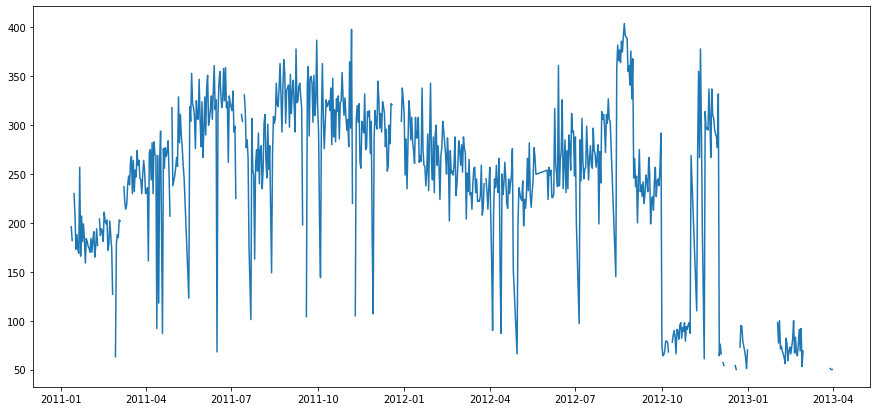

In [138]:
plt.figure(figsize=(15,7))
plt.plot(df_en_country['date'], df_en_country['count_Netherlands'])

In [ ]:
for var in 